In [1]:
# Pip install method (recommended)
!pip install ultralytics==8.0.196

In [2]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.2 🚀 Python-3.11.5 torch-2.2.2 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 110.9/228.3 GB disk)


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/Users/ahmadabdullah/Desktop/lbw-review-system/src/ball-tracking


In [4]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/best.pt conf=0.25 source={HOME}/images save=True

/Users/ahmadabdullah/Desktop/lbw-review-system/src/ball-tracking
Ultralytics YOLOv8.0.196 🚀 Python-3.11.7 torch-2.2.2 CPU (Apple M1)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/3 /Users/ahmadabdullah/Desktop/lbw-review-system/src/ball-tracking/images/Screenshot 2024-04-18 at 8.22.19 PM.png: 800x704 1 ball, 301.6ms
image 2/3 /Users/ahmadabdullah/Desktop/lbw-review-system/src/ball-tracking/images/Screenshot 2024-04-18 at 8.25.39 PM.png: 800x704 1 ball, 269.4ms
image 3/3 /Users/ahmadabdullah/Desktop/lbw-review-system/src/ball-tracking/images/Screenshot 2024-04-18 at 8.29.27 PM.png: 800x512 1 ball, 194.7ms
Speed: 6.8ms preprocess, 255.3ms inference, 5.0ms postprocess per image at shape (1, 3, 800, 512)
Results saved to /opt/homebrew/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


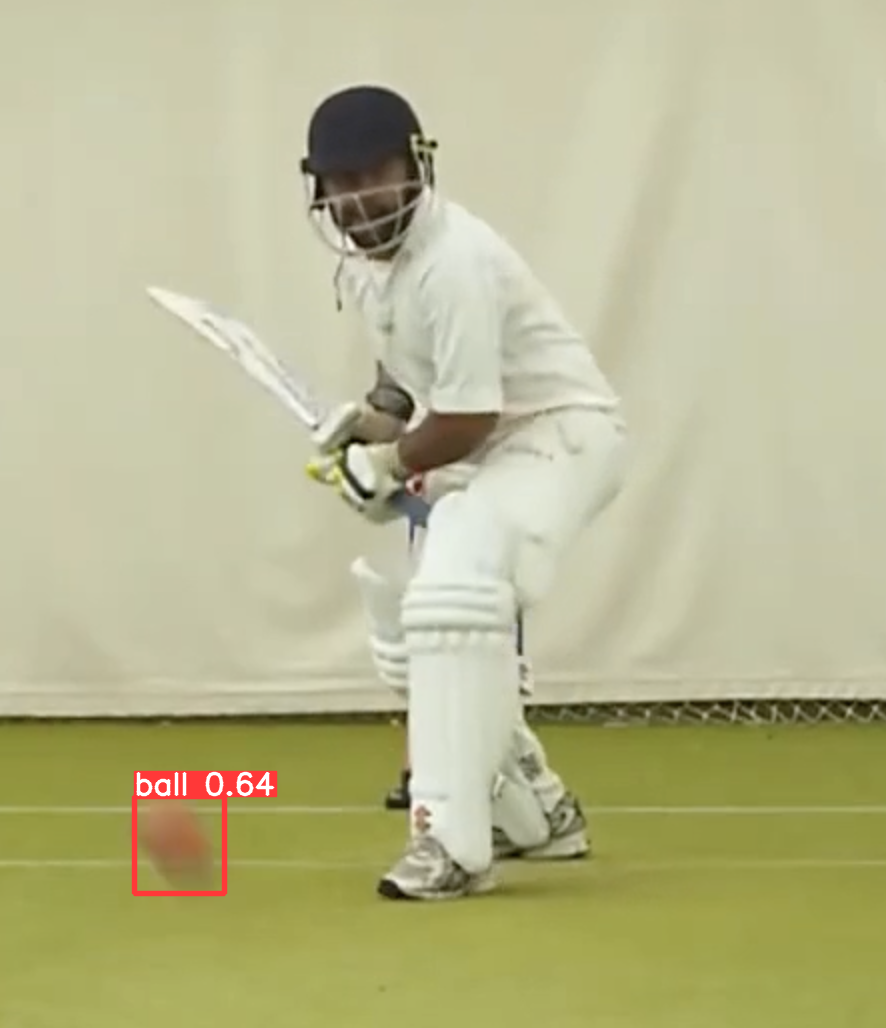

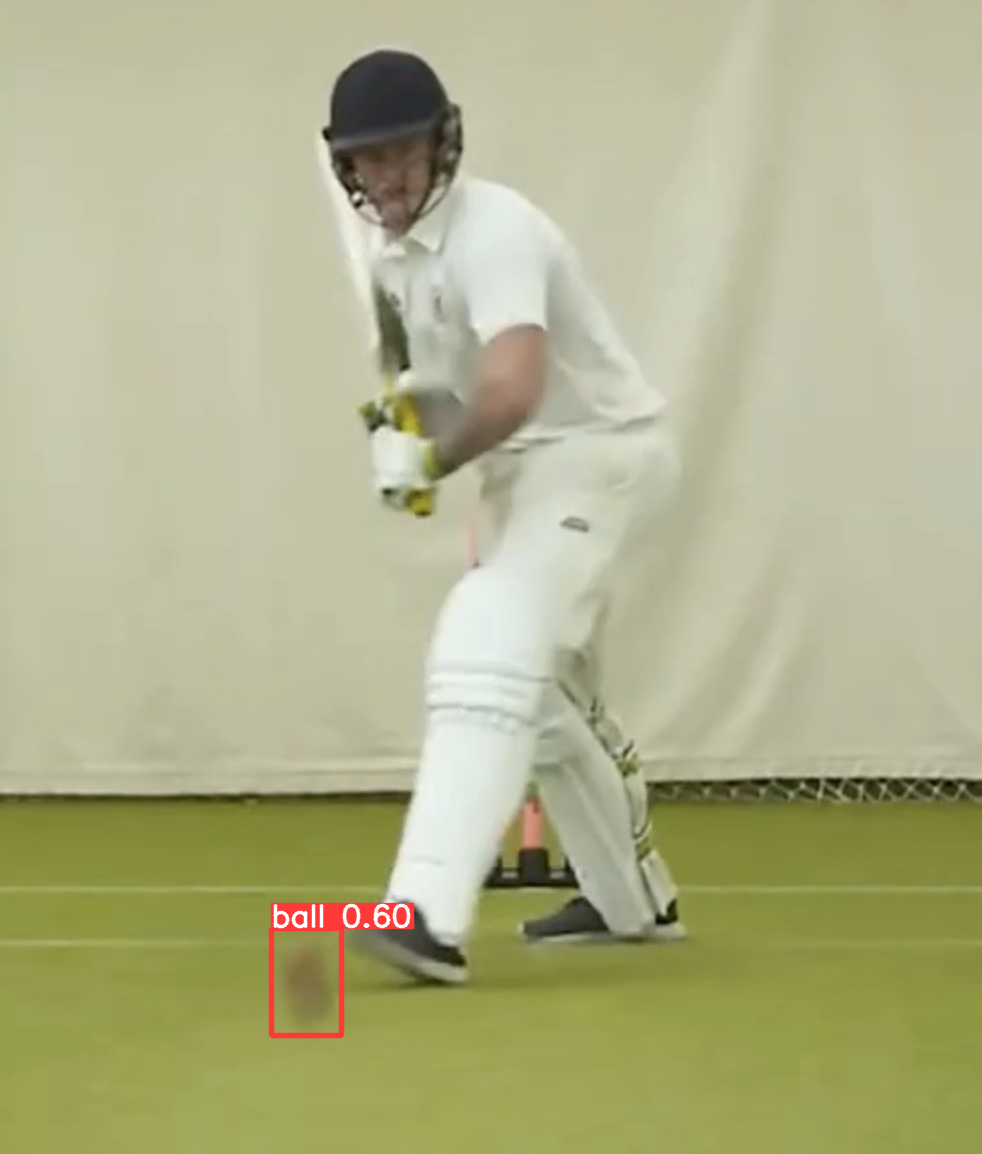

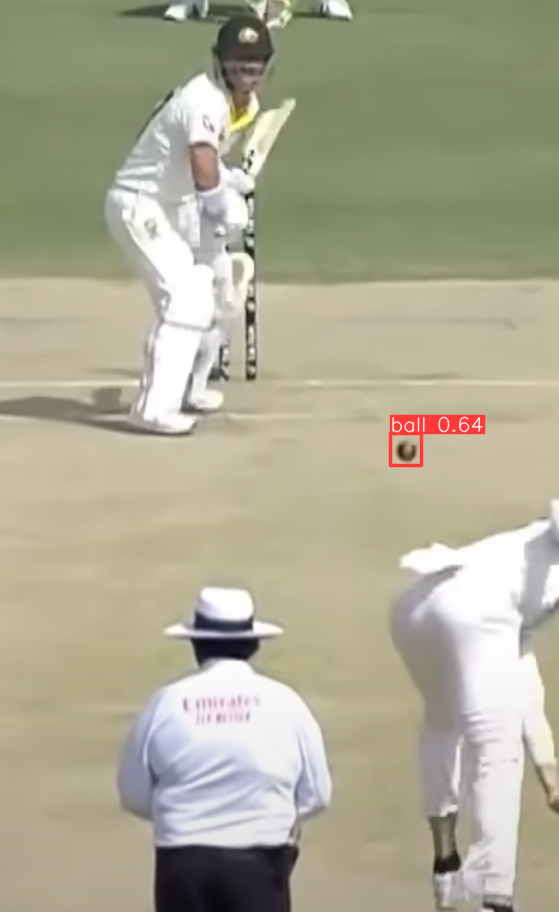

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/opt/homebrew/runs/detect/predict2/*.png'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="XaYRaTIxrFcAN0CfHjEN")
project = rf.workspace("ahmed-ws").project("ball-detection-3afaq")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to ball-detection-3 in yolov8:: 100%|█| 788/788 [


In [6]:
dataset.location

'/Users/ahmadabdullah/Desktop/lbw-review-system/src/ball-tracking/ball-detection-3'

In [7]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on img_40_JPG_jpg.rf.6025b3628d794f875a488961d7a22c90.jpg


{'predictions': [{'x': 61.0,
   'y': 37.5,
   'width': 22.0,
   'height': 39.0,
   'confidence': 0.8556550145149231,
   'class': 'ball',
   'class_id': 0,
   'detection_id': '6059f80d-03e2-40ef-8b55-15976dd1bde2',
   'image_path': '/Users/ahmadabdullah/Desktop/lbw-review-system/src/ball-tracking/ball-detection-3/test/images/img_40_JPG_jpg.rf.6025b3628d794f875a488961d7a22c90.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '416', 'height': '416'}}